1.1: Introduction to Missing Data

Objective:
Understand the different types of missing data and their implications for data analysis.

Research and Understand the Different Types of Missing Data:

1. Missing Completely at Random (MCAR):
Definition: The likelihood of a value being missing is independent of both observed and unobserved data. Missingness is purely random.
Scenario: You have a dataset from an online quiz where some answers are missing randomly because of user errors or technical issues. For example, in a dataset of quiz responses, some answers are missing because users accidentally skipped questions.
Example: A survey where some participants accidentally skip a question, and this skipping is unrelated to their answers on other questions. For instance, a survey on customer satisfaction where a few respondents accidentally leave the “satisfaction with customer service” question blank, regardless of their overall satisfaction.

2. Missing at Random (MAR):
Definition: The probability of a value being missing is related to other observed variables but not to the missing value itself.
Scenario: In a dataset of patient health records, older patients are less likely to report their income. The missing income data is related to the patient’s age but not to the income value itself.
Example: In a dataset of patient health records, older patients may be less likely to report their income. Here, the missingness of income data is related to the age of the patient but not to the income value itself. For example, a dataset where younger patients report their income more frequently than older patients.

3. Not Missing at Random (NMAR):
Definition: The probability of a value being missing is related to the missing value itself. This is the most challenging type to handle.
Scenario: A dataset on income levels where high-income individuals are less likely to report their income due to privacy concerns. The missing data is related to the income value itself.
Example: In a dataset of income levels, high-income individuals may be less likely to report their income due to privacy concerns. Thus, the missingness is related to the income value itself. For instance, a financial survey where individuals with higher incomes are less likely to disclose their earnings.

Explore Examples:

1. MCAR Example:
Scenario: You have a dataset from an online quiz where some answers are missing randomly because of user errors or technical issues. For example, in a dataset of quiz responses, some answers are missing because users accidentally skipped questions.
Example Dataset: A dataset from an online educational platform where user responses to certain questions are missing randomly.

2. MAR Example:
Scenario: In a dataset of patient health records, older patients are less likely to report their income. The missing income data is related to the patient’s age but not to the income value itself.
Example Dataset: A dataset from a health survey where missing income data is more common among older patients.

3. NMAR Example:
Scenario: A dataset on income levels where high-income individuals are less likely to report their income due to privacy concerns. The missing data is related to the income value itself.
Example Dataset: A financial survey dataset where individuals with higher incomes are less likely to disclose their earnings.

Resources:
1. Wikipedia: Missing Data: Provides a general overview of missing data types and strategies for handling them.
2. Introduction to Missing Data by Paul Allison: An informative guide on missing data, including types and handling methods.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('D:/Projects/Data-cleaning-series/Chapter01 Handling Missing Values/Products.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Product ID Product Name  Price     Category  Stock            Description
0           1     Widget A  19.99  Electronics  100.0  A high-quality widget
1           2     Widget B  29.99  Electronics    NaN                    NaN
2           3          NaN  15.00   Home Goods   50.0    Durable and stylish
3           4     Widget D    NaN   Home Goods  200.0     A versatile widget
4           5     Widget E   9.99          NaN   10.0  Compact and efficient


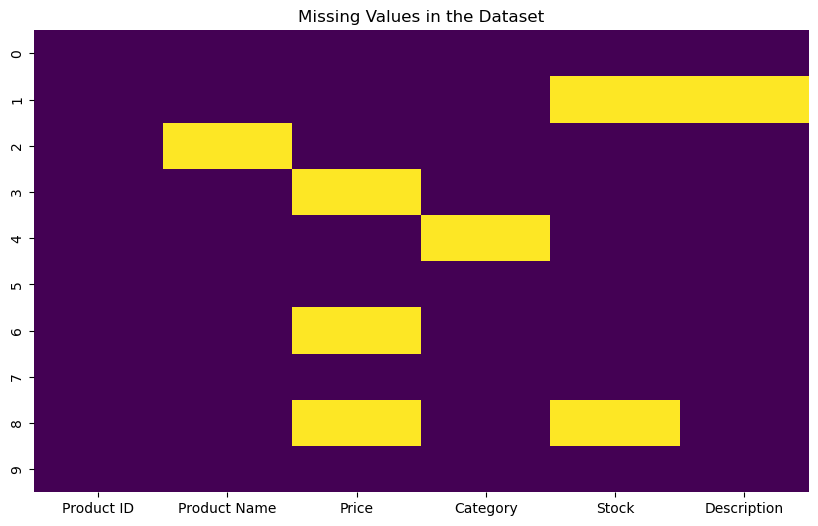

In [48]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

1.3 Techniques to handle the missing values
Techniques

A. Removal Techniques:
1. Listwise Deletion:
Description: Remove rows where any value is missing. This technique is straightforward but can result in a significant loss of data if many rows have missing values.
Example: df.dropna()

2. Pairwise Deletion:
Description: Use available data for each pair of variables in analysis, ignoring missing values for that pair. This method is useful in correlation or covariance calculations.
Example: df.corr(method='pearson', min_periods=1)

B. Imputation Techniques:
1. Mean/Median/Mode Imputation:
Description: Replace missing values with the mean (for numerical data), median (for numerical data with outliers), or mode (for categorical data) of the observed values.
Example: df.fillna(df.mean()) (Mean), df.fillna(df.median()) (Median)

2. K-Nearest Neighbors (KNN) Imputation:
Description: Use the K-nearest neighbors algorithm to estimate missing values based on the values of the nearest neighbors.
Example: from sklearn.impute import KNNImputer (Python)

3. Multiple Imputation by Chained Equations (MICE):
Description: Use multiple imputations to handle missing values by modeling each feature with missing data conditional on other features. Combines multiple imputation models to account for uncertainty.
Example: from miceforest import ImputationKernel (Python)

4. Predictive Modeling:
Description: Use regression or other predictive models to estimate missing values based on other available data.
Example: from sklearn.linear_model import LinearRegression (Python)

D. Advanced Techniques:
1. Interpolation:
Description: Estimate missing values based on the values of neighboring data points. Useful for time series data where values are missing at specific time points.
Example: df.interpolate(method='linear')

2. Data Augmentation:
Description: Generate additional data to fill in missing values. This technique can be used in conjunction with machine learning models.
Example: Using generative models or synthetic data methods.

E. Handling Categorical Data:
1. Mode Imputation:
Description: Replace missing values in categorical variables with the most frequent category.
Example: df['category'].fillna(df['category'].mode()[0])

2. Categorical Encoding:
Description: Replace missing categories with a special placeholder or encode missing values as a separate category.
Example: df['category'].fillna('Missing')

In [49]:
# Listwise Deletion: Remove rows with any missing data
listwise_deleted_df = df.dropna()

print("\nDataFrame after Listwise Deletion:")
print(listwise_deleted_df.to_string(index=False))



DataFrame after Listwise Deletion:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
         10     Widget J  49.99 Electronics   60.0            Best in class


In [50]:
# Pairwise Deletion: Remove rows with missing data in specific columns, e.g., 'Price' and 'Stock'
pairwise_deleted_df = df.dropna(subset=['Price', 'Stock'])

print("\nDataFrame after Pairwise Deletion (on 'Price' and 'Stock'):")
print(pairwise_deleted_df.to_string(index=False))


DataFrame after Pairwise Deletion (on 'Price' and 'Stock'):
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
         10     Widget J  49.99 Electronics   60.0            Best in class


In [51]:
# Mean Imputation: Replace missing numerical values with the mean of the column
df_mean_imputed = df.copy()
df_mean_imputed['Price'] = df_mean_imputed['Price'].fillna(df['Price'].mean())
df_mean_imputed['Stock'] = df_mean_imputed['Stock'].fillna(df['Stock'].mean())

print("\nDataFrame after Mean Imputation:")
print(df_mean_imputed.to_string(index=False))


DataFrame after Mean Imputation:
 Product ID Product Name     Price    Category   Stock              Description
          1     Widget A 19.990000 Electronics 100.000    A high-quality widget
          2     Widget B 29.990000 Electronics  80.625                      NaN
          3          NaN 15.000000  Home Goods  50.000      Durable and stylish
          4     Widget D 27.135714  Home Goods 200.000       A versatile widget
          5     Widget E  9.990000         NaN  10.000    Compact and efficient
          6     Widget F 25.000000 Electronics   0.000 Latest technology widget
          7     Widget G 27.135714     Kitchen 150.000     Multi-purpose widget
          8     Widget H 39.990000     Kitchen  75.000          Premium quality
          9     Widget I 27.135714 Electronics  80.625        Advanced features
         10     Widget J 49.990000 Electronics  60.000            Best in class


In [52]:
# Median Imputation: Replace missing numerical values with the median of the column
df_median_imputed = df.copy()
df_median_imputed['Price'] = df_median_imputed['Price'].fillna(df['Price'].median())
df_median_imputed['Stock'] = df_median_imputed['Stock'].fillna(df['Stock'].median())

print("\nDataFrame after Median Imputation:")
print(df_median_imputed.to_string(index=False))



DataFrame after Median Imputation:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics   67.5                      NaN
          3          NaN  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D  25.00  Home Goods  200.0       A versatile widget
          5     Widget E   9.99         NaN   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G  25.00     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I  25.00 Electronics   67.5        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class


In [53]:
# Mode Imputation: Replace missing categorical values with the mode of the column
df_mode_imputed = df.copy()
df_mode_imputed['Product Name'] = df_mode_imputed['Product Name'].fillna(df['Product Name'].mode()[0])
df_mode_imputed['Category'] = df_mode_imputed['Category'].fillna(df['Category'].mode()[0])
df_mode_imputed['Description'] = df_mode_imputed['Description'].fillna(df['Description'].mode()[0])

print("\nDataFrame after Mode Imputation:")
print(df_mode_imputed.to_string(index=False))



DataFrame after Mode Imputation:
 Product ID Product Name  Price    Category  Stock              Description
          1     Widget A  19.99 Electronics  100.0    A high-quality widget
          2     Widget B  29.99 Electronics    NaN    A high-quality widget
          3     Widget A  15.00  Home Goods   50.0      Durable and stylish
          4     Widget D    NaN  Home Goods  200.0       A versatile widget
          5     Widget E   9.99 Electronics   10.0    Compact and efficient
          6     Widget F  25.00 Electronics    0.0 Latest technology widget
          7     Widget G    NaN     Kitchen  150.0     Multi-purpose widget
          8     Widget H  39.99     Kitchen   75.0          Premium quality
          9     Widget I    NaN Electronics    NaN        Advanced features
         10     Widget J  49.99 Electronics   60.0            Best in class


In [54]:
#K-Nearest Neighbors (KNN) Imputation
from sklearn.impute import KNNImputer

# KNN Imputation
# We need to convert categorical data to numeric for KNNImputer to work
# Encoding categorical variables
df_encoded = pd.get_dummies(df[['Price', 'Stock']], drop_first=True)

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_encoded.copy()
df_imputed[:] = imputer.fit_transform(df_encoded)

# Mapping back to original DataFrame
df[['Price', 'Stock']] = df_imputed

print("\nDataFrame after KNN Imputation:")
print(df.to_string(index=False))


DataFrame after KNN Imputation:
 Product ID Product Name     Price    Category      Stock              Description
          1     Widget A 19.990000 Electronics 100.000000    A high-quality widget
          2     Widget B 29.990000 Electronics  58.333333                      NaN
          3          NaN 15.000000  Home Goods  50.000000      Durable and stylish
          4     Widget D 36.656667  Home Goods 200.000000       A versatile widget
          5     Widget E  9.990000         NaN  10.000000    Compact and efficient
          6     Widget F 25.000000 Electronics   0.000000 Latest technology widget
          7     Widget G 36.656667     Kitchen 150.000000     Multi-purpose widget
          8     Widget H 39.990000     Kitchen  75.000000          Premium quality
          9     Widget I 27.135714 Electronics  80.625000        Advanced features
         10     Widget J 49.990000 Electronics  60.000000            Best in class


Explanation
Encoding Categorical Variables:

Before applying KNN imputation, categorical data needs to be encoded into numeric values. Here, we only encode the numerical columns ('Price' and 'Stock') for simplicity.
Applying KNN Imputer:

We use KNNImputer from sklearn.impute to perform imputation based on the nearest neighbors. The n_neighbors parameter specifies the number of neighbors to use for imputation.
Mapping Back:

After imputation, we update the original DataFrame with the imputed values.
Output
The code will output the DataFrame with missing values in 'Price' and 'Stock' columns filled based on the values of their nearest neighbors.

This technique is useful when you believe that missing data can be inferred from similar instances in the dataset. However, it requires all features to be numeric, so categorical variables need to be encoded or handled separately.